In [1]:
#!pip install xlrd

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_excel("Rotten_Tomatoes_Movies3.xls")

In [4]:
# Check initial data
display(df.head())

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [6]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64


In [7]:
df = df.dropna()

In [8]:
df.shape

(7610, 16)

In [9]:
# Display column data types
print(df.dtypes)


movie_title                   object
movie_info                    object
critics_consensus             object
rating                        object
genre                         object
directors                     object
writers                       object
cast                          object
in_theaters_date      datetime64[ns]
on_streaming_date     datetime64[ns]
runtime_in_minutes           float64
studio_name                   object
tomatometer_status            object
tomatometer_rating             int64
tomatometer_count              int64
audience_rating              float64
dtype: object


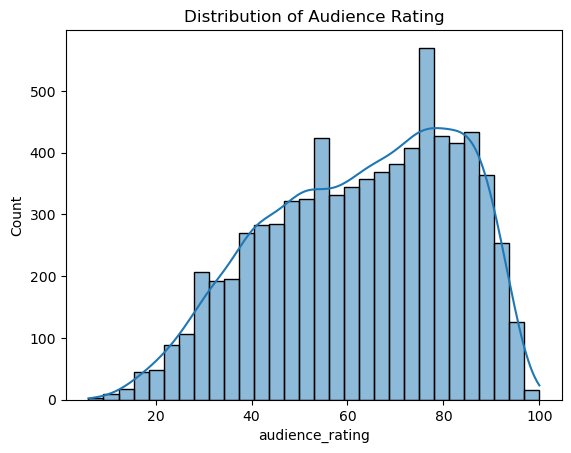

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize target variable distribution
if 'audience_rating' in df.columns:
    sns.histplot(df['audience_rating'], bins=30, kde=True)
    plt.title('Distribution of Audience Rating')
    plt.show()
else:
    raise ValueError("The target variable 'audience_rating' is not in the dataset.")

In [11]:
# Convert DateTime columns to numeric features (if any)
datetime_cols = df.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    df[col] = df[col].astype(np.int64)  # Convert to Unix timestamp (numeric format)

In [12]:
# Encode categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

In [13]:
for col in categorical_cols:
    df[col] = df[col].astype(str)

In [14]:
df[categorical_cols] = df[categorical_cols].fillna('Missing')

In [15]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [16]:
# Feature-target split
X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print("X_train and X_test Data Shape", X_train.shape, X_test.shape)
print("y_train and y_test Data Shape", y_train.shape, y_test.shape)

X_train and X_test Data Shape (6088, 15) (1522, 15)
y_train and y_test Data Shape (6088,) (1522,)


In [47]:
# Step 4: Model Selection and Training
# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Evaluate models
print("\nModel Performance:")
for name, model in models.items():
    try:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results in the dictionary
        evaluation_results[name] = {
            'MAE': mae,
            'MSE': mse,
            'R2 Score': r2
        }

        # Print the performance of each model
        print(f"{name} Performance:")
        print(f" MAE: {mae:.4f}, MSE: {mse:.4f}, R2 Score: {r2:.4f}\n")

    except Exception as e:
        # Handle any errors that occur during fitting or prediction
        print(f"Error with model {name}: {e}")

# Optional: Show evaluation results in a DataFrame for better clarity
evaluation_df = pd.DataFrame(evaluation_results)
print("\nModel Evaluation Summary:")
print(evaluation_df)


Model Performance:
Linear Regression Performance:
 MAE: 15.7800, MSE: 356.6807, R2 Score: 0.0624

Decision Tree Performance:
 MAE: 13.6393, MSE: 312.1321, R2 Score: 0.1795

Random Forest Performance:
 MAE: 9.7016, MSE: 151.8937, R2 Score: 0.6007


Model Evaluation Summary:
          Linear Regression  Decision Tree  Random Forest
MAE               15.780024      13.639290       9.701557
MSE              356.680655     312.132063     151.893662
R2 Score           0.062370       0.179478       0.600707


In [19]:
# Step 5: Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [20]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train[:2000], y_train[:2000])
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}


In [21]:
# Final Model Evaluation
best_rf = grid_search.best_estimator_
y_pred_final = best_rf.predict(X_test)
print("\nFinal Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("MSE:", mean_squared_error(y_test, y_pred_final))
print("R2 Score:", r2_score(y_test, y_pred_final))


Final Model Performance:
MAE: 10.00535327388295
MSE: 158.56389638620337
R2 Score: 0.5831727780729236


In [22]:
# Step 6: Pipeline Creation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(**grid_search.best_params_, random_state=42))
])

pipeline.fit(X_train, y_train)
final_predictions = pipeline.predict(X_test)
print("Pipeline R2 Score:", r2_score(y_test, final_predictions))

Pipeline R2 Score: 0.6088560425088263


In [23]:
# Step 7: Predict 'audience_rating' for the existing data (same dataset)
# Preprocess the same dataset for prediction (using the same preprocessing steps as for training data)
df_preprocessed = df.copy()

In [24]:
# Step 7.1: Apply the same LabelEncoding for categorical features in the dataset
for col in categorical_cols:
    if col in df_preprocessed.columns:
        # Instead of directly transforming, handle unseen labels
        try:
            df_preprocessed[col] = label_encoders[col].transform(df_preprocessed[col])
        except ValueError as e:
            # Handle unseen labels (e.g., assign a default value or ignore)
            # Here, we'll replace unseen labels with a placeholder value like -1
            unseen_mask = ~df_preprocessed[col].isin(label_encoders[col].classes_)
            df_preprocessed.loc[unseen_mask, col] = -1
            print(f"Warning: Unseen labels in '{col}' replaced with -1.")

In [25]:
# Step 7.2: Drop any remaining rows with missing values (if any) from the dataset
df_preprocessed = df_preprocessed.dropna()

In [26]:
# Step 7.3: Ensure all features in df_preprocessed are numeric
# Check if any column is still object or string type after encoding, which should no longer be the case
print(df_preprocessed.dtypes)

movie_title             int32
movie_info              int32
critics_consensus       int32
rating                  int32
genre                   int32
directors               int32
writers                 int32
cast                    int32
in_theaters_date        int64
on_streaming_date       int64
runtime_in_minutes    float64
studio_name             int32
tomatometer_status      int32
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
dtype: object


In [27]:
# Step 7.4: Use the trained pipeline to predict 'audience_rating' for the preprocessed dataset
# Remove the target variable from the prediction data
X_preprocessed = df_preprocessed.drop(columns=['audience_rating'])
predictions = pipeline.predict(X_preprocessed)

In [28]:
# Step 7.5: Add predictions to the original dataframe as a new column
df['predicted_audience_rating'] = predictions

In [29]:
# Step 7.6: Display predictions for the 'audience_rating' column in the dataset
print("\nPredicted 'audience_rating' for the existing dataset:")
print(df[['audience_rating', 'predicted_audience_rating']].head())


Predicted 'audience_rating' for the existing dataset:
   audience_rating  predicted_audience_rating
0             53.0                  51.403026
1             64.0                  67.912104
3             97.0                  84.786821
4             74.0                  75.274462
5             37.0                  37.348987


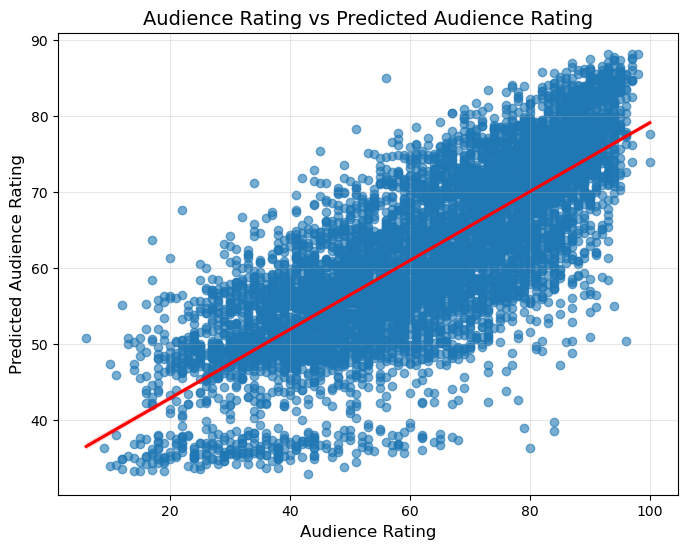

In [37]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='audience_rating', y='predicted_audience_rating', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})

# Adding labels and title
plt.title('Audience Rating vs Predicted Audience Rating', fontsize=14)
plt.xlabel('Audience Rating', fontsize=12)
plt.ylabel('Predicted Audience Rating', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [39]:
# Step 8: Save the Pipeline for Future Use (Optional, if you want to save the trained pipeline)
import joblib
pipeline_filename = 'audience_rating_pipeline.pkl'
joblib.dump(pipeline, pipeline_filename)
print(f"Pipeline saved as {pipeline_filename}")

Pipeline saved as audience_rating_pipeline.pkl


In [41]:
# Step 9: Validate Model Accuracy on Test Set (using the original data)
print("\nFinal Model Accuracy Validation (on the test set):")
print("R2 Score on Test Set:", r2_score(y_test, final_predictions))
print("MAE on Test Set:", mean_absolute_error(y_test, final_predictions))
print("MSE on Test Set:", mean_squared_error(y_test, final_predictions))

# Conclusion
print("\nProject Completed Successfully! Use the saved pipeline for future predictions.")


Final Model Accuracy Validation (on the test set):
R2 Score on Test Set: 0.6088560425088263
MAE on Test Set: 9.64872697824559
MSE on Test Set: 148.79380876561504

Project Completed Successfully! Use the saved pipeline for future predictions.
